In [1]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

import pickle
import os
import time

from datetime import datetime
import pandas as pd
import numpy as np
import sweetviz

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# imports best practice sklearn
# python core library for machine learning and data science
import sklearn 
from sklearn import set_config
set_config(transform_output = "pandas")

#imputers
from sklearn.impute import KNNImputer, SimpleImputer

# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# model selection e hiperparameters optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold



# from psmpy import PsmPy
# from psmpy.plotting import *

# from pycaret.classification import *
import multiprocessing
import pickle
import joblib

import graphviz
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import export_graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

from matplotlib.ticker import FuncFormatter
import xgboost as xgb



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE

sns.set(style = "whitegrid")
plt.rcParams['figure.figsize'] = (10,6)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# !pip install scikit-learn==1.2

In [3]:
# %pip install psmpy

In [4]:
# %pip install sweetviz

In [5]:
# %pip install pycaret

In [6]:
# %pip install graphviz

In [7]:
# %pip install  imblearn

In [8]:
CWD = os.getcwd()
DATA_PATH = os.path.join(CWD, "Data","datasets_TFM + diccionario")
DATA_PATH

'd:\\BOOTCAMP\\Proyectos propios\\Propensity model easymoney\\Data\\datasets_TFM + diccionario'

In [9]:
FILE_NAME = "customer_commercial_activity.csv"
CUSTOMER_ACTIVITY_CSV_PATH = os.path.join(DATA_PATH, FILE_NAME)

In [10]:
FILE_NAME = "customer_products.csv"
CUSTOMER_PRODUCTS_CSV_PATH = os.path.join(DATA_PATH, FILE_NAME)

In [11]:
FILE_NAME = "customer_sociodemographics.csv"
CUSTOMER_SOCIODEMOGRAPHICS_CSV_PATH = os.path.join(DATA_PATH, FILE_NAME)

In [12]:
FILE_NAME = "sales.csv"
SALES_CSV_PATH = os.path.join(DATA_PATH, FILE_NAME)

In [13]:
FILE_NAME = "product_description.csv"
PRODUCT_DESCRIPTION_CSV_PATH = os.path.join(DATA_PATH, FILE_NAME)

In [14]:
print("Working with these versions of libraries\n")
print(f"Numpy version {np.__version__}")
print(f"Pandas version {pd.__version__}")
print(f"XGBoost version {xgb.__version__}")
print("Working with this sklearn version {}".format(sklearn.__version__))

Working with these versions of libraries

Numpy version 1.25.0
Pandas version 2.0.2
XGBoost version 2.0.0
Working with this sklearn version 1.2.0


In [15]:
# Creamos una función simple para hacer un report simple sobre los DataFrame suministrados
def report_df(dataframe, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print("El tamaño del dataset es", dataframe.shape[0], "filas y", dataframe.shape[1], "columnas")
    print("-------------------------------------------")
    print(dataframe.info(verbose = verbose))
    total_nulos = dataframe.isnull().sum().sum()
    print("-------------------------------------------")
    print(f"Tenemos un total de {total_nulos} nulos")
    print("-------------------------------------------")
    print("Hay", dataframe.duplicated().sum(), "duplicados")


In [16]:
df_customer_activity = pd.read_csv(CUSTOMER_ACTIVITY_CSV_PATH, index_col = 0)
df_customer_activity.sample(3)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
9210140,1504636,2019-01,2018-11,KHQ,0.00,03 - UNIVERSITARIO
6195879,1105540,2018-09,2015-11,KHE,0.00,03 - UNIVERSITARIO
2690731,1279556,2018-05,2017-07,KHE,0.00,03 - UNIVERSITARIO


In [17]:
df_customer_products = pd.read_csv(CUSTOMER_PRODUCTS_CSV_PATH, index_col = 0)
df_customer_products.sample(3)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
6512545,1024294,2018-10,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
10938229,1524639,2019-03,0,0,0,0,0,0,0,0,0.00,0.00,0,0,1,0,1
5139648,1060064,2018-08,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


In [18]:
df_customer_sociodemographics = pd.read_csv(CUSTOMER_SOCIODEMOGRAPHICS_CSV_PATH, index_col = 0)
df_customer_sociodemographics.sample(3)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
6650880,1273889,2018-10,ES,25.00,V,21,N,72634.77
13312227,1508631,2019-05,ES,30.00,V,39,N,NaN
9989195,1362143,2019-02,ES,29.00,V,21,N,204806.97


In [19]:
df_sales = pd.read_csv(SALES_CSV_PATH, index_col = 0)
df_sales.sample(3)

,pk_sale,cid,month_sale,product_ID,net_margin
82206,88872,1502438,2019-02-01,8871,58.90
189836,196502,1460138,2018-09-01,4657,48.70
56889,63555,1134220,2018-09-01,2235,75.50


In [20]:
df_product_description = pd.read_csv(PRODUCT_DESCRIPTION_CSV_PATH, index_col = 0)
df_product_description.sample(3)

,pk_product_ID,product_desc,family_product
10,1119,funds,investment
7,2335,short_term_deposit,investment
0,4657,em_acount,account


In [21]:
def change_to_obj_column(df,column):
    df[column] = df[column].astype("object")

    return df.info(verbose = True)

In [22]:
def change_to_int_column(df,column):
    df[column] = df[column].astype("int")

    return df.info(verbose = True)

In [23]:
def change_to_float_column(df,column):
    df[column] = df[column].astype("float")

    return df.info(verbose = True)

In [24]:
def change_to_utctime(df,column):
    df[column] = pd.to_datetime(df[column],format="ISO8601", utc=True)

    return df.info(verbose = True)

In [25]:
def change_to_datetime(df,column):
    df[column] = pd.to_datetime(df[column],format="%d-%m-%Y")

    return df.info(verbose = True)

In [26]:
def describe_cat_df(df):
    
    return df.describe(exclude = np.number).T

In [27]:
def describe_num_df(df):
    
    return df.describe(include = np.number).T

In [28]:
report_df(df_customer_activity)

df_customer_activity.head(2)

El tamaño del dataset es 5962924 filas y 6 columnas
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB
None
-------------------------------------------
Tenemos un total de 266977 nulos
-------------------------------------------
Hay 0 duplicados


,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01,2018-01,KHL,1.00,02 - PARTICULARES
1,1050611,2018-01,2015-08,KHE,0.00,03 - UNIVERSITARIO


In [29]:
df_customer_activity['active_customer'].value_counts()

active_customer
0.00    3557573
1.00    2405351
Name: count, dtype: int64

In [30]:
change_to_int_column(df_customer_activity,'active_customer')

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   pk_cid           int64 
 1   pk_partition     object
 2   entry_date       object
 3   entry_channel    object
 4   active_customer  int32 
 5   segment          object
dtypes: int32(1), int64(1), object(4)
memory usage: 295.7+ MB


In [31]:
df_customer_activity.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [32]:
df_customer_activity["segment"].value_counts()

segment
03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
01 - TOP                97939
Name: count, dtype: int64

In [33]:
df_customer_activity["segment"] = df_customer_activity["segment"].str.split("-",expand = True)[0]

In [34]:
change_to_utctime(df_customer_activity,'pk_partition')

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype              
---  ------           -----              
 0   pk_cid           int64              
 1   pk_partition     datetime64[ns, UTC]
 2   entry_date       object             
 3   entry_channel    object             
 4   active_customer  int32              
 5   segment          object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(1), object(3)
memory usage: 295.7+ MB


In [35]:
change_to_utctime(df_customer_activity,'entry_date')

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype              
---  ------           -----              
 0   pk_cid           int64              
 1   pk_partition     datetime64[ns, UTC]
 2   entry_date       datetime64[ns, UTC]
 3   entry_channel    object             
 4   active_customer  int32              
 5   segment          object             
dtypes: datetime64[ns, UTC](2), int32(1), int64(1), object(2)
memory usage: 295.7+ MB


In [36]:
df_customer_activity['pk_partition'] = df_customer_activity['pk_partition'].dt.date
df_customer_activity['entry_date'] = df_customer_activity['entry_date'].dt.date

In [37]:
df_customer_activity['pk_partition'].value_counts()

pk_partition
2019-05-01    442995
2019-04-01    439627
2019-03-01    436183
2019-02-01    431727
2019-01-01    426875
2018-12-01    422481
2018-11-01    416387
2018-10-01    402300
2018-09-01    375323
2018-08-01    352922
2018-07-01    339339
2018-06-01    252104
2018-05-01    249926
2018-04-01    247463
2018-03-01    245258
2018-02-01    242521
2018-01-01    239493
Name: count, dtype: int64

In [38]:
change_to_datetime(df_customer_activity,"pk_partition")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       object        
 3   entry_channel    object        
 4   active_customer  int32         
 5   segment          object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(3)
memory usage: 295.7+ MB


In [39]:
change_to_datetime(df_customer_activity,"entry_date")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  int32         
 5   segment          object        
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 295.7+ MB


In [40]:
df_customer_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  int32         
 5   segment          object        
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 295.7+ MB


In [41]:
df_customer_activity.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [42]:
change_to_obj_column(df_customer_activity,"pk_cid")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  int32         
 5   segment          object        
dtypes: datetime64[ns](2), int32(1), object(3)
memory usage: 295.7+ MB


In [43]:
df_customer_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-01,2018-01-01,KHL,1,02
1,1050611,2018-01-01,2015-08-01,KHE,0,03
2,1050612,2018-01-01,2015-08-01,KHE,0,03
3,1050613,2018-01-01,2015-08-01,KHD,0,03
4,1050614,2018-01-01,2015-08-01,KHE,1,03


## Para este análisis voy a proponer un modelo de propensión para uno de los productos que tiene el banco easyMoney -- product_ID = 4657 , product_desc = emc_account , family_product = account

In [44]:
report_df(df_customer_products)

df_customer_products.head(2)

El tamaño del dataset es 5962924 filas y 17 columnas
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 818.9+ MB
None
-------------------------------------------
Tenemos un total de 122 nulos
-----------------------

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1050611,2018-01,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


In [45]:
df_customer_products.isnull().sum()

pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [46]:
change_to_utctime(df_customer_products,"pk_partition")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype              
---  ------              -----              
 0   pk_cid              int64              
 1   pk_partition        datetime64[ns, UTC]
 2   short_term_deposit  int64              
 3   loans               int64              
 4   mortgage            int64              
 5   funds               int64              
 6   securities          int64              
 7   long_term_deposit   int64              
 8   em_account_pp       int64              
 9   credit_card         int64              
 10  payroll             float64            
 11  pension_plan        float64            
 12  payroll_account     int64              
 13  emc_account         int64              
 14  debit_card          int64              
 15  em_account_p        int64              
 16  em_acount           int64              
dtypes: datetime64[ns, UTC](1), floa

In [47]:
df_customer_products['pk_partition'] = df_customer_products['pk_partition'].dt.date

change_to_datetime(df_customer_products,"pk_partition")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(14)
memory usage: 818.9 MB


In [48]:
change_to_obj_column(df_customer_products,"pk_cid")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(13), object(1)
memory usage: 818.9+ MB


In [49]:
columns_to_drop = [
"credit_card",
"debit_card",
"em_account_p",
"em_account_pp",
"em_acount",
"funds",
"loans",
"long_term_deposit",
"mortgage",
"payroll",
"payroll_account",
"pension_plan",
"securities",
"short_term_deposit"
]

### Eliminamos las columnas que no vamos a analizar y nos quedamos únicamente con el TARGET = emc_account

In [50]:
for column in columns_to_drop:
    if column in df_customer_products:
        df_customer_products.drop(column, axis = 1,inplace=True)


In [51]:
df_customer_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        object        
 1   pk_partition  datetime64[ns]
 2   emc_account   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 182.0+ MB


In [52]:
TARGET = "emc_account"

In [53]:
df_customer_products[TARGET].describe()

count   5962924.00
mean          0.05
std           0.23
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: emc_account, dtype: float64

# Vemos como nuestro dataset está muy desbalanceado ya que el tan solo el 5% de nuestros clientes ha comntratado una cuenta crypto
# Realizaremos un benchmark sin balacera y posteriormente crearemos un rebalanceo del dataset y compararemos el resultado obtenido

In [54]:
report_df(df_customer_sociodemographics)

df_customer_sociodemographics.head(2)

El tamaño del dataset es 5962924 filas y 8 columnas
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB
None
-------------------------------------------
Tenemos un total de 1543393 nulos
-------------------------------------------
Hay 0 duplicados


,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,ES,29.00,H,35,N,87218.10
1,1050611,2018-01,ES,13.00,V,23,N,35548.74


In [55]:
df_customer_sociodemographics['country_id'].value_counts()

country_id
ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AT         51
AR         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
LU         17
ET         17
QA         17
CI         17
SA         17
CM         17
SN         17
MR         17
NO         17
RU         17
CO         17
GA         17
GT         17
DO         17
SE         16
DJ         11
PT         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: count, dtype: int64

In [56]:
change_to_obj_column(df_customer_sociodemographics,"pk_cid")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        object 
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(1), object(5)
memory usage: 409.4+ MB


In [57]:
change_to_utctime(df_customer_sociodemographics,"pk_partition")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype              
---  ------        -----              
 0   pk_cid        object             
 1   pk_partition  datetime64[ns, UTC]
 2   country_id    object             
 3   region_code   float64            
 4   gender        object             
 5   age           int64              
 6   deceased      object             
 7   salary        float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 409.4+ MB


In [58]:
df_customer_sociodemographics["pk_partition"] = df_customer_sociodemographics["pk_partition"].dt.date

change_to_datetime(df_customer_sociodemographics,"pk_partition")

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        object        
 1   pk_partition  datetime64[ns]
 2   country_id    object        
 3   region_code   float64       
 4   gender        object        
 5   age           int64         
 6   deceased      object        
 7   salary        float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 409.4+ MB


In [59]:
df_customer_sociodemographics["gender"].value_counts(dropna=False)

gender
H      3087502
V      2875397
NaN         25
Name: count, dtype: int64

In [60]:
df_customer_sociodemographics.isnull().sum()

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1541104
dtype: int64

In [61]:
report_df(df_sales)

df_sales.head(2)

El tamaño del dataset es 240773 filas y 5 columnas
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   cid         240773 non-null  int64  
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.0+ MB
None
-------------------------------------------
Tenemos un total de 0 nulos
-------------------------------------------
Hay 0 duplicados


,pk_sale,cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.90
1,6667,35063,2018-06-01,2335,1625.20


In [62]:
df_sales.rename(columns = {"cid":"pk_cid"},inplace=True)

In [63]:
change_to_obj_column(df_sales,"pk_cid")

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   pk_cid      240773 non-null  object 
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.0+ MB


In [64]:
change_to_utctime(df_sales,"month_sale")

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   pk_sale     240773 non-null  int64              
 1   pk_cid      240773 non-null  object             
 2   month_sale  240773 non-null  datetime64[ns, UTC]
 3   product_ID  240773 non-null  int64              
 4   net_margin  240773 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(1)
memory usage: 11.0+ MB


In [65]:
df_sales["month_sale"] = df_sales["month_sale"].dt.date

In [66]:
change_to_datetime(df_sales,"month_sale")

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  int64         
 1   pk_cid      240773 non-null  object        
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  int64         
 4   net_margin  240773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 11.0+ MB


In [67]:
change_to_obj_column(df_sales,"product_ID")

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  int64         
 1   pk_cid      240773 non-null  object        
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  object        
 4   net_margin  240773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 11.0+ MB


In [68]:
change_to_obj_column(df_sales,"pk_sale")

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  object        
 1   pk_cid      240773 non-null  object        
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  object        
 4   net_margin  240773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 11.0+ MB


In [69]:
df_sales.head(2)

,pk_sale,pk_cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.90
1,6667,35063,2018-06-01,2335,1625.20


In [70]:
report_df(df_product_description)

df_product_description.head(2)

El tamaño del dataset es 13 filas y 3 columnas
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     int64 
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes
None
-------------------------------------------
Tenemos un total de 0 nulos
-------------------------------------------
Hay 0 duplicados


,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card


In [71]:
df_product_description.rename(columns = {"pk_product_ID":"product_ID"},inplace = True)

In [72]:
change_to_obj_column(df_product_description,"product_ID")

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_ID      13 non-null     object
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


In [73]:
df_merge = df_customer_products.copy()

In [74]:
print(df_merge.shape)

df_merge = pd.merge(df_merge, df_customer_activity, on = ["pk_cid","pk_partition"], how = "left")

print(df_merge.shape)

(5962924, 3)
(5962924, 7)


In [75]:
print(df_merge.shape)

df_merge = pd.merge(df_merge, df_customer_sociodemographics, on = ["pk_cid","pk_partition"], how = "left")

print(df_merge.shape)

(5962924, 7)
(5962924, 13)


In [76]:
df_merge["pk_partition"].value_counts()

pk_partition
2019-05-01    442995
2019-04-01    439627
2019-03-01    436183
2019-02-01    431727
2019-01-01    426875
2018-12-01    422481
2018-11-01    416387
2018-10-01    402300
2018-09-01    375323
2018-08-01    352922
2018-07-01    339339
2018-06-01    252104
2018-05-01    249926
2018-04-01    247463
2018-03-01    245258
2018-02-01    242521
2018-01-01    239493
Name: count, dtype: int64

In [77]:
df_sales["month_sale"].value_counts().sort_index(ascending=False)

month_sale
2019-05-01    10211
2019-04-01     9889
2019-03-01    11506
2019-02-01    11360
2019-01-01    11872
2018-12-01    15015
2018-11-01    19155
2018-10-01    27693
2018-09-01    24488
2018-08-01    21054
2018-07-01    20602
2018-06-01    11558
2018-05-01     9558
2018-04-01     9962
2018-03-01    11668
2018-02-01    15182
Name: count, dtype: int64

In [78]:
df_sales.head(10)

,pk_sale,pk_cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.90
1,6667,35063,2018-06-01,2335,1625.20
2,6668,37299,2018-02-01,2335,1279.70
3,6669,39997,2018-02-01,2335,1511.90
4,6670,44012,2018-02-01,2335,1680.30
5,6671,66770,2018-06-01,2335,1772.00
6,6672,100296,2018-04-01,2335,1391.90
7,6673,101658,2018-08-01,2335,1466.70
8,6674,114080,2018-03-01,2335,1772.90
9,6675,124554,2018-10-01,2335,1534.50


In [79]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  object        
 1   pk_cid      240773 non-null  object        
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  object        
 4   net_margin  240773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 11.0+ MB


In [80]:
df_merge

,pk_cid,pk_partition,emc_account,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-01,0,2018-01-01,KHL,1,02,ES,29.00,H,35,N,87218.10
1,1050611,2018-01-01,0,2015-08-01,KHE,0,03,ES,13.00,V,23,N,35548.74
2,1050612,2018-01-01,0,2015-08-01,KHE,0,03,ES,13.00,V,23,N,122179.11
3,1050613,2018-01-01,0,2015-08-01,KHD,0,03,ES,50.00,H,22,N,119775.54
4,1050614,2018-01-01,0,2015-08-01,KHE,1,03,ES,50.00,V,23,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-01,0,2016-08-01,KHE,0,03,ES,50.00,V,22,N,43912.17
5962920,1166764,2019-05-01,0,2016-08-01,KHE,0,03,ES,26.00,V,23,N,23334.99
5962921,1166763,2019-05-01,0,2016-08-01,KHE,1,02,ES,50.00,H,47,N,NaN
5962922,1166789,2019-05-01,0,2016-08-01,KHE,0,03,ES,50.00,H,22,N,199592.82


In [81]:
df_product_description.head(10)

,product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


In [82]:
print(df_sales.shape)

df_sales = pd.merge(df_sales, df_product_description, on = ["product_ID"], how = "left")

print(df_sales.shape)

(240773, 5)
(240773, 7)


In [83]:
df_sales.head(10)

,pk_sale,pk_cid,month_sale,product_ID,net_margin,product_desc,family_product
0,6666,33620,2018-05-01,2335,952.90,short_term_deposit,investment
1,6667,35063,2018-06-01,2335,1625.20,short_term_deposit,investment
2,6668,37299,2018-02-01,2335,1279.70,short_term_deposit,investment
3,6669,39997,2018-02-01,2335,1511.90,short_term_deposit,investment
4,6670,44012,2018-02-01,2335,1680.30,short_term_deposit,investment
5,6671,66770,2018-06-01,2335,1772.00,short_term_deposit,investment
6,6672,100296,2018-04-01,2335,1391.90,short_term_deposit,investment
7,6673,101658,2018-08-01,2335,1466.70,short_term_deposit,investment
8,6674,114080,2018-03-01,2335,1772.90,short_term_deposit,investment
9,6675,124554,2018-10-01,2335,1534.50,short_term_deposit,investment


In [84]:
print(df_merge.shape)

df_merge = pd.merge(df_merge, df_sales, left_on = ["pk_cid","pk_partition"], right_on = ["pk_cid","month_sale"], how = "inner")

print(df_merge.shape)

(5962924, 13)
(240773, 19)


In [85]:
report_df(df_merge)

df_merge.head(2)

El tamaño del dataset es 240773 filas y 19 columnas
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   pk_cid           240773 non-null  object        
 1   pk_partition     240773 non-null  datetime64[ns]
 2   emc_account      240773 non-null  int64         
 3   entry_date       240773 non-null  datetime64[ns]
 4   entry_channel    161872 non-null  object        
 5   active_customer  240773 non-null  int32         
 6   segment          161501 non-null  object        
 7   country_id       240773 non-null  object        
 8   region_code      240694 non-null  float64       
 9   gender           240770 non-null  object        
 10  age              240773 non-null  int64         
 11  deceased         240773 non-null  object        
 12  salary           133154 non-null

,pk_cid,pk_partition,emc_account,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,pk_sale,month_sale,product_ID,net_margin,product_desc,family_product
0,546275,2018-02-01,0,2018-02-01,KHK,0,02,ES,7.00,H,39,N,164911.86,130558,2018-02-01,4657,87.30,em_acount,account
1,546332,2018-02-01,1,2017-05-01,KAT,0,02,ES,8.00,H,68,N,NaN,79057,2018-02-01,8871,75.10,emc_account,account


In [86]:
df_merge.isnull().sum()

pk_cid                  0
pk_partition            0
emc_account             0
entry_date              0
entry_channel       78901
active_customer         0
segment             79272
country_id              0
region_code            79
gender                  3
age                     0
deceased                0
salary             107619
pk_sale                 0
month_sale              0
product_ID              0
net_margin              0
product_desc            0
family_product          0
dtype: int64

In [87]:
describe_cat_df(df_merge)

,count,unique,top,freq,mean,min,25%,50%,75%,max
pk_cid,240773.00,152754.00,1387215.00,10.00,NaT,NaT,NaT,NaT,NaT,NaT
pk_partition,240773,NaN,NaN,NaN,2018-09-09 21:39:56.944840192,2018-02-01,2018-07-01,2018-09-01,2018-12-01,2019-05-01
entry_date,240773,NaN,NaN,NaN,2018-01-28 01:48:46.299876352,2015-01-01,2017-10-01,2018-07-01,2018-10-01,2019-05-01
entry_channel,161872,45,KHM,28696,NaT,NaT,NaT,NaT,NaT,NaT
segment,161501,3,02,103656,NaT,NaT,NaT,NaT,NaT,NaT
country_id,240773,23,ES,240695,NaT,NaT,NaT,NaT,NaT,NaT
gender,240770,2,V,128452,NaT,NaT,NaT,NaT,NaT,NaT
deceased,240773,2,N,240752,NaT,NaT,NaT,NaT,NaT,NaT
pk_sale,240773.00,240773.00,130558.00,1.00,NaT,NaT,NaT,NaT,NaT,NaT
month_sale,240773,NaN,NaN,NaN,2018-09-09 21:39:56.944840192,2018-02-01,2018-07-01,2018-09-01,2018-12-01,2019-05-01


In [88]:
describe_num_df(df_merge)

,count,mean,std,min,25%,50%,75%,max
emc_account,240773.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00
active_customer,240773.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
region_code,240694.00,26.54,13.42,1.00,15.00,28.00,36.00,52.00
age,240773.00,33.96,13.46,2.00,22.00,31.00,41.00,102.00
salary,133154.00,116397.67,220144.12,3731.79,62220.72,90010.11,133176.00,28894395.51
net_margin,240773.00,606.88,1735.81,25.00,61.40,69.10,79.20,18466.40


In [89]:
list_vars_non_variance = [column for column in df_merge.columns if df_merge[column].nunique(dropna = False) == 1]
df_merge.drop(list_vars_non_variance, axis = 1, inplace = True)

In [90]:
nan_cols = df_merge.columns[df_merge.isnull().any()]

In [91]:
nan_cols

Index(['entry_channel', 'segment', 'region_code', 'gender', 'salary'], dtype='object')

In [92]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   pk_cid           240773 non-null  object        
 1   pk_partition     240773 non-null  datetime64[ns]
 2   emc_account      240773 non-null  int64         
 3   entry_date       240773 non-null  datetime64[ns]
 4   entry_channel    161872 non-null  object        
 5   active_customer  240773 non-null  int32         
 6   segment          161501 non-null  object        
 7   country_id       240773 non-null  object        
 8   region_code      240694 non-null  float64       
 9   gender           240770 non-null  object        
 10  age              240773 non-null  int64         
 11  deceased         240773 non-null  object        
 12  salary           133154 non-null  float64       
 13  pk_sale          240773 non-null  object        
 14  month_sale       240

In [93]:
ct_imputer = ColumnTransformer(
    transformers = [
    # elementos: nombre, transformer, una lista con columnas
    ("impute_entry_channel", SimpleImputer(strategy = "most_frequent"), ["entry_channel"]),
    ("impute_segment", SimpleImputer(strategy = "most_frequent"), ["segment"]),
    ("impute_region_code", SimpleImputer(strategy = "most_frequent"), ["region_code"]),
    ("impute_gender", SimpleImputer(strategy = "most_frequent"), ["gender"]),
    ("impute_salary", SimpleImputer(strategy = "mean"), ["salary"])
    ],
    remainder = "passthrough"
)

# ct_preprocessing = ColumnTransformer(
# transformers = [
# ("oe", OrdinalEncoder(), [3])
# ],
# remainder = "passthrough"
# )

pipe = Pipeline(
steps = [
("impute", ct_imputer),
# ("preprocessing", ct_preprocessing)
]
)

X_ = pipe.fit_transform(df_merge)
X_.head(3).T

,0,1,2
impute_entry_channel__entry_channel,KHK,KAT,KFA
impute_segment__segment,02,02,02
impute_region_code__region_code,7.00,8.00,28.00
impute_gender__gender,H,H,H
impute_salary__salary,164911.86,116397.67,67853.07
remainder__pk_cid,546275,546332,536169
remainder__pk_partition,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00
remainder__emc_account,0,1,1
remainder__entry_date,2018-02-01 00:00:00,2017-05-01 00:00:00,2017-03-01 00:00:00
remainder__active_customer,0,0,1


In [94]:
X_.columns[X_.isnull().any()]

Index([], dtype='object')

In [95]:
report_df(X_)

El tamaño del dataset es 240773 filas y 19 columnas
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   impute_entry_channel__entry_channel  240773 non-null  object        
 1   impute_segment__segment              240773 non-null  object        
 2   impute_region_code__region_code      240773 non-null  float64       
 3   impute_gender__gender                240773 non-null  object        
 4   impute_salary__salary                240773 non-null  float64       
 5   remainder__pk_cid                    240773 non-null  object        
 6   remainder__pk_partition              240773 non-null  datetime64[ns]
 7   remainder__emc_account               240773 non-null  int64         
 8   remainder__entry_date                240773 non-

In [96]:
X_.head(10)

,impute_entry_channel__entry_channel,impute_segment__segment,impute_region_code__region_code,impute_gender__gender,impute_salary__salary,remainder__pk_cid,remainder__pk_partition,remainder__emc_account,remainder__entry_date,remainder__active_customer,remainder__country_id,remainder__age,remainder__deceased,remainder__pk_sale,remainder__month_sale,remainder__product_ID,remainder__net_margin,remainder__product_desc,remainder__family_product
0,KHK,02,7.00,H,164911.86,546275,2018-02-01,0,2018-02-01,0,ES,39,N,130558,2018-02-01,4657,87.30,em_acount,account
1,KAT,02,8.00,H,116397.67,546332,2018-02-01,1,2017-05-01,0,ES,68,N,79057,2018-02-01,8871,75.10,emc_account,account
2,KFA,02,28.00,H,67853.07,536169,2018-02-01,1,2017-03-01,1,ES,38,N,91409,2018-02-01,3819,59.60,debit_card,payment_card
3,KAT,02,28.00,H,152377.11,560443,2018-02-01,0,2016-12-01,1,ES,42,N,91427,2018-02-01,3819,69.00,debit_card,payment_card
4,KFA,01,28.00,V,144377.82,560733,2018-02-01,1,2015-07-01,1,ES,66,N,17572,2018-02-01,2312,53.20,credit_card,payment_card
5,KAT,02,14.00,V,45588.78,551298,2018-02-01,0,2016-12-01,1,ES,40,N,91419,2018-02-01,3819,54.70,debit_card,payment_card
6,KAT,02,28.00,H,137988.96,517621,2018-02-01,0,2015-04-01,1,ES,46,N,91398,2018-02-01,3819,53.30,debit_card,payment_card
7,KAT,01,28.00,V,184138.23,532232,2018-02-01,0,2017-08-01,1,ES,36,N,13336,2018-02-01,2336,1750.80,long_term_deposit,investment
8,KAT,02,28.00,H,113208.81,532532,2018-02-01,1,2015-05-01,1,ES,41,N,17562,2018-02-01,2312,53.60,credit_card,payment_card
9,KHK,02,28.00,H,201225.30,525304,2018-02-01,0,2018-02-01,0,ES,47,N,130529,2018-02-01,4657,62.90,em_acount,account


In [97]:
X_['time_to_first_purchase'] = X_['remainder__month_sale'] - X_["remainder__entry_date"]

In [98]:
X_['time_to_first_purchase'] = X_['time_to_first_purchase'].dt.days

In [99]:
X_.drop("remainder__entry_date", axis = 1,inplace = True)

In [100]:
X_["year"] = X_["remainder__month_sale"].dt.year
X_["month"] = X_["remainder__month_sale"].dt.month

In [101]:
X_.head()

,impute_entry_channel__entry_channel,impute_segment__segment,impute_region_code__region_code,impute_gender__gender,impute_salary__salary,remainder__pk_cid,remainder__pk_partition,remainder__emc_account,remainder__active_customer,remainder__country_id,...,remainder__deceased,remainder__pk_sale,remainder__month_sale,remainder__product_ID,remainder__net_margin,remainder__product_desc,remainder__family_product,time_to_first_purchase,year,month
0,KHK,02,7.00,H,164911.86,546275,2018-02-01,0,0,ES,...,N,130558,2018-02-01,4657,87.30,em_acount,account,0,2018,2
1,KAT,02,8.00,H,116397.67,546332,2018-02-01,1,0,ES,...,N,79057,2018-02-01,8871,75.10,emc_account,account,276,2018,2
2,KFA,02,28.00,H,67853.07,536169,2018-02-01,1,1,ES,...,N,91409,2018-02-01,3819,59.60,debit_card,payment_card,337,2018,2
3,KAT,02,28.00,H,152377.11,560443,2018-02-01,0,1,ES,...,N,91427,2018-02-01,3819,69.00,debit_card,payment_card,427,2018,2
4,KFA,01,28.00,V,144377.82,560733,2018-02-01,1,1,ES,...,N,17572,2018-02-01,2312,53.20,credit_card,payment_card,946,2018,2


In [102]:
drop_columns = ["pk_partition","remainder__month_sale"]

for column in drop_columns:
    if column in X_:
        X_.drop(column,axis = 1,inplace = True)

X_.info()
X_.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   impute_entry_channel__entry_channel  240773 non-null  object        
 1   impute_segment__segment              240773 non-null  object        
 2   impute_region_code__region_code      240773 non-null  float64       
 3   impute_gender__gender                240773 non-null  object        
 4   impute_salary__salary                240773 non-null  float64       
 5   remainder__pk_cid                    240773 non-null  object        
 6   remainder__pk_partition              240773 non-null  datetime64[ns]
 7   remainder__emc_account               240773 non-null  int64         
 8   remainder__active_customer           240773 non-null  int32         
 9   remainder__country_id                240773 non-null  object        
 

,impute_entry_channel__entry_channel,impute_segment__segment,impute_region_code__region_code,impute_gender__gender,impute_salary__salary,remainder__pk_cid,remainder__pk_partition,remainder__emc_account,remainder__active_customer,remainder__country_id,remainder__age,remainder__deceased,remainder__pk_sale,remainder__product_ID,remainder__net_margin,remainder__product_desc,remainder__family_product,time_to_first_purchase,year,month
0,KHK,02,7.00,H,164911.86,546275,2018-02-01,0,0,ES,39,N,130558,4657,87.30,em_acount,account,0,2018,2
1,KAT,02,8.00,H,116397.67,546332,2018-02-01,1,0,ES,68,N,79057,8871,75.10,emc_account,account,276,2018,2
2,KFA,02,28.00,H,67853.07,536169,2018-02-01,1,1,ES,38,N,91409,3819,59.60,debit_card,payment_card,337,2018,2
3,KAT,02,28.00,H,152377.11,560443,2018-02-01,0,1,ES,42,N,91427,3819,69.00,debit_card,payment_card,427,2018,2
4,KFA,01,28.00,V,144377.82,560733,2018-02-01,1,1,ES,66,N,17572,2312,53.20,credit_card,payment_card,946,2018,2
5,KAT,02,14.00,V,45588.78,551298,2018-02-01,0,1,ES,40,N,91419,3819,54.70,debit_card,payment_card,427,2018,2
6,KAT,02,28.00,H,137988.96,517621,2018-02-01,0,1,ES,46,N,91398,3819,53.30,debit_card,payment_card,1037,2018,2
7,KAT,01,28.00,V,184138.23,532232,2018-02-01,0,1,ES,36,N,13336,2336,1750.80,long_term_deposit,investment,184,2018,2
8,KAT,02,28.00,H,113208.81,532532,2018-02-01,1,1,ES,41,N,17562,2312,53.60,credit_card,payment_card,1007,2018,2
9,KHK,02,28.00,H,201225.30,525304,2018-02-01,0,0,ES,47,N,130529,4657,62.90,em_acount,account,0,2018,2


In [103]:
describe_num_df(X_)

,count,mean,std,min,25%,50%,75%,max
impute_region_code__region_code,240773.00,26.54,13.42,1.00,15.00,28.00,36.00,52.00
impute_salary__salary,240773.00,116397.67,163711.65,3731.79,84090.84,116397.67,116397.67,28894395.51
remainder__emc_account,240773.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00
remainder__active_customer,240773.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
remainder__age,240773.00,33.96,13.46,2.00,22.00,31.00,41.00,102.00
remainder__net_margin,240773.00,606.88,1735.81,25.00,61.40,69.10,79.20,18466.40
time_to_first_purchase,240773.00,224.83,341.06,0.00,0.00,31.00,334.00,1581.00
year,240773.00,2018.23,0.42,2018.00,2018.00,2018.00,2018.00,2019.00
month,240773.00,6.57,3.37,1.00,3.00,7.00,10.00,12.00


In [104]:
X_["remainder__emc_account"].describe() #limpiando datos y quedandonos únicamente con los clientes que han realizado alguna compra subimos a 11% nuestro TARGET

count   240773.00
mean         0.11
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: remainder__emc_account, dtype: float64

In [105]:
X_["year"].value_counts()

year
2018    185935
2019     54838
Name: count, dtype: int64

In [106]:
X_["month"].value_counts()

month
10    27693
2     26542
9     24488
3     23174
8     21054
7     20602
4     19851
5     19769
11    19155
12    15015
1     11872
6     11558
Name: count, dtype: int64

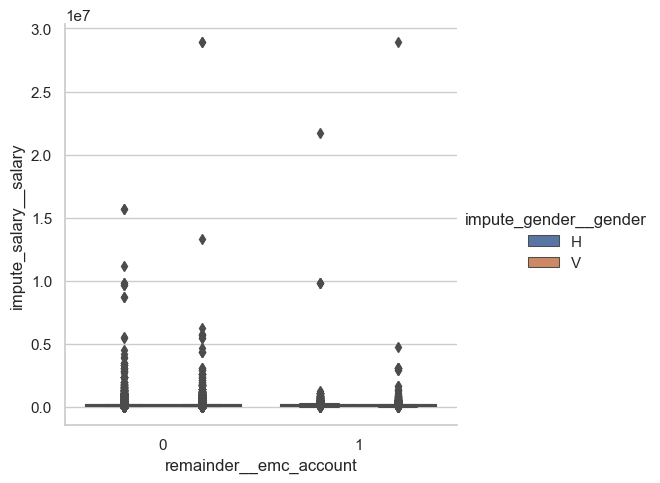

In [107]:
sns.catplot(data = X_,x = "remainder__emc_account",y = "impute_salary__salary",kind = "box",hue = "impute_gender__gender")

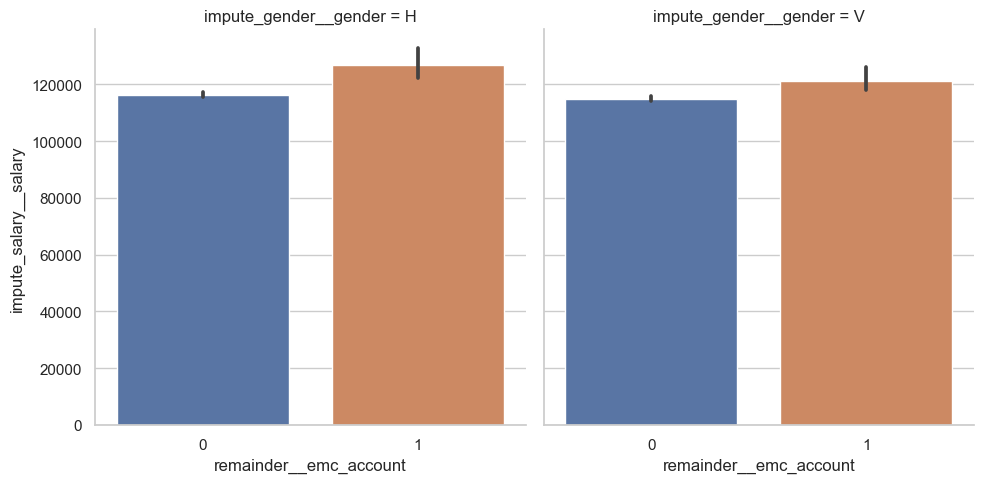

In [108]:
sns.catplot(data = X_,x = "remainder__emc_account",y = "impute_salary__salary",kind = "bar",col = "impute_gender__gender")

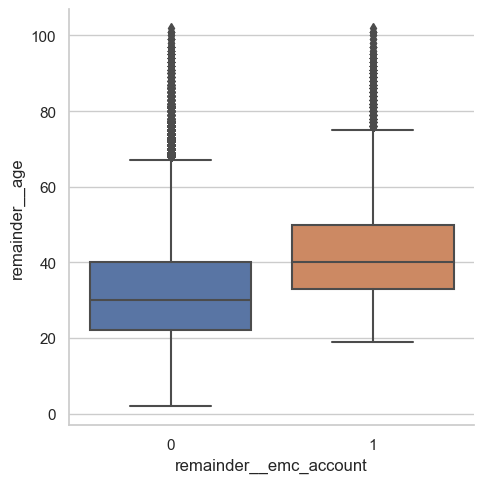

In [110]:
sns.catplot(data = X_,x = "remainder__emc_account",y = "remainder__age",kind = "box")

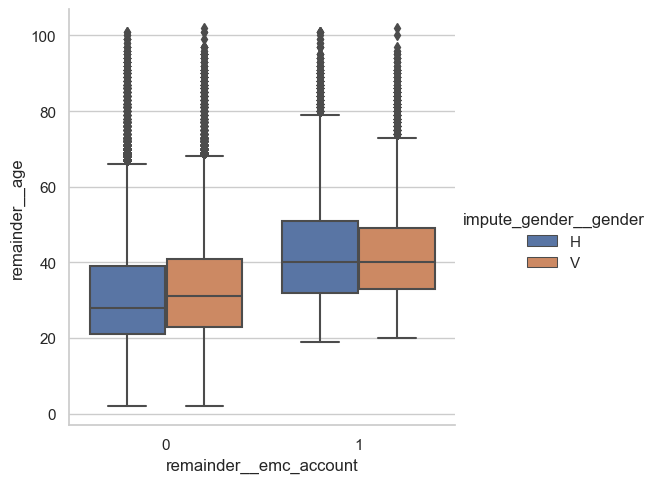

In [109]:
sns.catplot(data = X_,x = "remainder__emc_account",y = "remainder__age",kind = "box",hue = "impute_gender__gender")

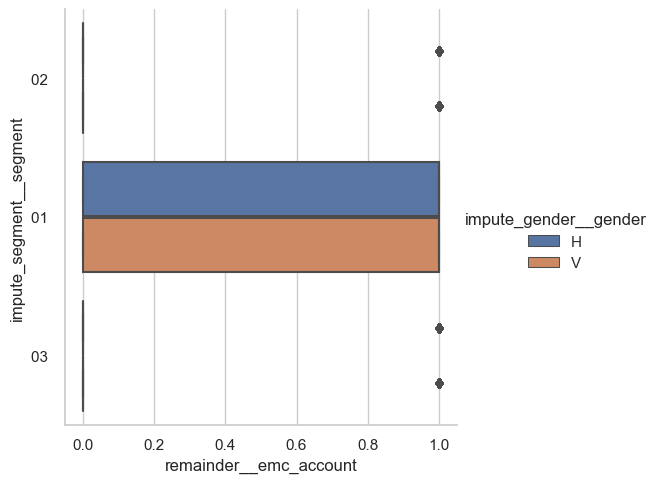

In [111]:
sns.catplot(data = X_,x = "remainder__emc_account",y = "impute_segment__segment",kind = "box",hue = "impute_gender__gender")

#### impute_entry_channel__entry_channel -> Frecuency encoding

In [ ]:
df_channel_num = pd.DataFrame(X_['impute_entry_channel__entry_channel'].value_counts(dropna = False)) #NaN
df_channel_num.columns = ['entry_channel_COUNT']
df_channel_num['impute_entry_channel__entry_channel_column'] = df_channel_num.index
# df_channel_num


In [ ]:
print(X_.shape)

X_ = X_.merge(df_channel_num, left_on= "impute_entry_channel__entry_channel", right_on = 'impute_entry_channel__entry_channel_column')

print(X_.shape)

(240773, 20)
(240773, 22)


In [ ]:
X_.head(2)

,impute_entry_channel__entry_channel,impute_segment__segment,impute_region_code__region_code,impute_gender__gender,impute_salary__salary,remainder__pk_cid,remainder__pk_partition,remainder__emc_account,remainder__active_customer,remainder__country_id,...,remainder__pk_sale,remainder__product_ID,remainder__net_margin,remainder__product_desc,remainder__family_product,time_to_first_purchase,year,month,entry_channel_COUNT,impute_entry_channel__entry_channel_column
0,KHK,02,7.00,H,164911.86,546275,2018-02-01,0,0,ES,...,130558,4657,87.30,em_acount,account,0,2018,2,21662,KHK
1,KHK,02,28.00,H,201225.30,525304,2018-02-01,0,0,ES,...,130529,4657,62.90,em_acount,account,0,2018,2,21662,KHK


In [ ]:
X_.columns

Index(['impute_entry_channel__entry_channel', 'impute_segment__segment',
       'impute_region_code__region_code', 'impute_gender__gender',
       'impute_salary__salary', 'remainder__pk_cid', 'remainder__pk_partition',
       'remainder__emc_account', 'remainder__active_customer',
       'remainder__country_id', 'remainder__age', 'remainder__deceased',
       'remainder__pk_sale', 'remainder__product_ID', 'remainder__net_margin',
       'remainder__product_desc', 'remainder__family_product',
       'time_to_first_purchase', 'year', 'month', 'entry_channel_COUNT',
       'impute_entry_channel__entry_channel_column'],
      dtype='object')

In [ ]:
drop_columns_1 = ["impute_entry_channel__entry_channel","impute_entry_channel__entry_channel_column","remainder__pk_partition"]

for column in drop_columns_1:
    if column in X_:
        X_.drop(column,axis = 1,inplace = True)

X_.info()
X_.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   impute_segment__segment          240773 non-null  object 
 1   impute_region_code__region_code  240773 non-null  float64
 2   impute_gender__gender            240773 non-null  object 
 3   impute_salary__salary            240773 non-null  float64
 4   remainder__pk_cid                240773 non-null  object 
 5   remainder__emc_account           240773 non-null  int64  
 6   remainder__active_customer       240773 non-null  int32  
 7   remainder__country_id            240773 non-null  object 
 8   remainder__age                   240773 non-null  int64  
 9   remainder__deceased              240773 non-null  object 
 10  remainder__pk_sale               240773 non-null  object 
 11  remainder__product_ID            240773 non-null  object 
 12  re

,impute_segment__segment,impute_region_code__region_code,impute_gender__gender,impute_salary__salary,remainder__pk_cid,remainder__emc_account,remainder__active_customer,remainder__country_id,remainder__age,remainder__deceased,remainder__pk_sale,remainder__product_ID,remainder__net_margin,remainder__product_desc,remainder__family_product,time_to_first_purchase,year,month,entry_channel_COUNT
0,02,7.00,H,164911.86,546275,0,0,ES,39,N,130558,4657,87.30,em_acount,account,0,2018,2,21662
1,02,28.00,H,201225.30,525304,0,0,ES,47,N,130529,4657,62.90,em_acount,account,0,2018,2,21662
2,02,28.00,V,106187.94,525682,0,1,ES,50,N,91402,3819,59.10,debit_card,payment_card,92,2018,2,21662
3,02,28.00,H,158588.01,582195,0,1,ES,52,N,130607,4657,88.00,em_acount,account,0,2018,2,21662
4,02,41.00,V,78784.83,571634,0,1,ES,45,N,130589,4657,76.90,em_acount,account,92,2018,2,21662
5,02,28.00,V,116397.67,569942,0,0,ES,48,N,130586,4657,63.90,em_acount,account,31,2018,2,21662
6,02,28.00,V,117742.59,593121,0,1,ES,38,N,130617,4657,71.10,em_acount,account,0,2018,2,21662
7,02,28.00,V,107092.59,434584,0,1,ES,20,N,60823,2235,85.20,payroll_account,account,62,2018,2,21662
8,02,50.00,H,116397.67,798783,0,1,ES,40,N,130888,4657,54.90,em_acount,account,0,2018,2,21662
9,02,28.00,H,93966.72,786754,0,1,ES,38,N,130870,4657,70.10,em_acount,account,0,2018,2,21662


### One hot encoding => cat_columns

In [ ]:
X_.describe(exclude = ['number']).T

,count,unique,top,freq
impute_segment__segment,240773,3,02,182928
impute_gender__gender,240773,2,V,128455
remainder__pk_cid,240773,152754,1387215,10
remainder__country_id,240773,23,ES,240695
remainder__deceased,240773,2,N,240752
remainder__pk_sale,240773,240773,130558,1
remainder__product_ID,240773,13,4657,117435
remainder__product_desc,240773,13,em_acount,117435
remainder__family_product,240773,5,account,166618


In [ ]:
frecuency_columns = ["remainder__pk_cid","remainder__pk_sale"]

In [ ]:
df_cid = pd.DataFrame(X_['remainder__pk_cid'].value_counts(dropna = False)) #NaN
df_cid.columns = ['remainder__pk_cid_COUNT']
df_cid['remainder__pk_cid_column'] = df_cid.index

In [ ]:
print(X_.shape)

X_ = X_.merge(df_cid, left_on= "remainder__pk_cid", right_on = 'remainder__pk_cid_column')

print(X_.shape)

(240773, 19)
(240773, 21)


In [ ]:
df_sale = pd.DataFrame(X_['remainder__pk_sale'].value_counts(dropna = False)) #NaN
df_sale.columns = ['remainder__pk_sale_COUNT']
df_sale['remainder__pk_sale_column'] = df_sale.index

In [ ]:
print(X_.shape)

X_ = X_.merge(df_sale, left_on= "remainder__pk_sale", right_on = 'remainder__pk_sale_column')

print(X_.shape)

(240773, 21)
(240773, 23)


In [ ]:
X_.columns

Index(['impute_segment__segment', 'impute_region_code__region_code',
       'impute_gender__gender', 'impute_salary__salary', 'remainder__pk_cid',
       'remainder__emc_account', 'remainder__active_customer',
       'remainder__country_id', 'remainder__age', 'remainder__deceased',
       'remainder__pk_sale', 'remainder__product_ID', 'remainder__net_margin',
       'remainder__product_desc', 'remainder__family_product',
       'time_to_first_purchase', 'year', 'month', 'entry_channel_COUNT',
       'remainder__pk_cid_COUNT', 'remainder__pk_cid_column',
       'remainder__pk_sale_COUNT', 'remainder__pk_sale_column'],
      dtype='object')

In [ ]:
drop_columns_2 = ['remainder__pk_cid_column','remainder__pk_sale_column','remainder__pk_sale','remainder__pk_cid']

for column in drop_columns_2:
    if column in X_:
        X_.drop(column,axis=1,inplace=True)

In [ ]:
X_.describe(exclude = ['number']).T

,count,unique,top,freq
impute_segment__segment,240773,3,02,182928
impute_gender__gender,240773,2,V,128455
remainder__country_id,240773,23,ES,240695
remainder__deceased,240773,2,N,240752
remainder__product_ID,240773,13,4657,117435
remainder__product_desc,240773,13,em_acount,117435
remainder__family_product,240773,5,account,166618


In [ ]:
def OHE (dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name],prefix=column_name)
    dataframe = pd.concat([dataframe,_dummy_dataset],axis=1)
    return dataframe.drop(column_name,axis=1)

In [ ]:
for column in X_.describe(exclude = np.number).columns:
    X_ =  OHE(X_,column)

In [ ]:
X_.head(2)

,impute_region_code__region_code,impute_salary__salary,remainder__emc_account,remainder__active_customer,remainder__age,remainder__net_margin,time_to_first_purchase,year,month,entry_channel_COUNT,...,remainder__product_desc_payroll,remainder__product_desc_payroll_account,remainder__product_desc_pension_plan,remainder__product_desc_securities,remainder__product_desc_short_term_deposit,remainder__family_product_account,remainder__family_product_investment,remainder__family_product_loan,remainder__family_product_payment_card,remainder__family_product_pension_plan
0,7.00,164911.86,0,0,39,87.30,0,2018,2,21662,...,False,False,False,False,False,True,False,False,False,False
1,7.00,164911.86,0,0,39,1420.40,28,2018,3,21662,...,False,False,False,False,True,False,True,False,False,False


In [ ]:
X_.pivot_table(index= ['year', 'month'], values = 'remainder__emc_account', aggfunc = [len, np.sum, np.mean])

len                    sum  \
           remainder__emc_account remainder__emc_account   
year month                                                 
2018 2                      15182                   2507   
     3                      11668                   1765   
     4                       9962                   1455   
     5                       9558                   1438   
     6                      11558                   1500   
     7                      20602                   1230   
     8                      21054                    995   
     9                      24488                   1185   
     10                     27693                   1288   
     11                     19155                   1642   
     12                     15015                   1873   
2019 1                      11872                   1742   
     2                      11360                   1907   
     3                      11506                   1568   
     4                       9889                   1694   
     5                      10211                   2203   

                             mean  
           remainder__emc_account  
year month                         
2018 2                       0.17  
     3                       0.15  
     4                       0.15  
     5                       0.15  
     6                       0.13  
     7                       0.06  
     8                       0.05  
     9                       0.05  
     10                      0.05  
     11                      0.09  
     12                      0.12  
2019 1                       0.15  
     2                       0.17  
     3                       0.14  
     4                       0.17  
     5                       0.22

In [ ]:
X_.isnull().sum()

impute_region_code__region_code           0
impute_salary__salary                     0
remainder__emc_account                    0
remainder__active_customer                0
remainder__age                            0
                                         ..
remainder__family_product_account         0
remainder__family_product_investment      0
remainder__family_product_loan            0
remainder__family_product_payment_card    0
remainder__family_product_pension_plan    0
Length: 73, dtype: int64

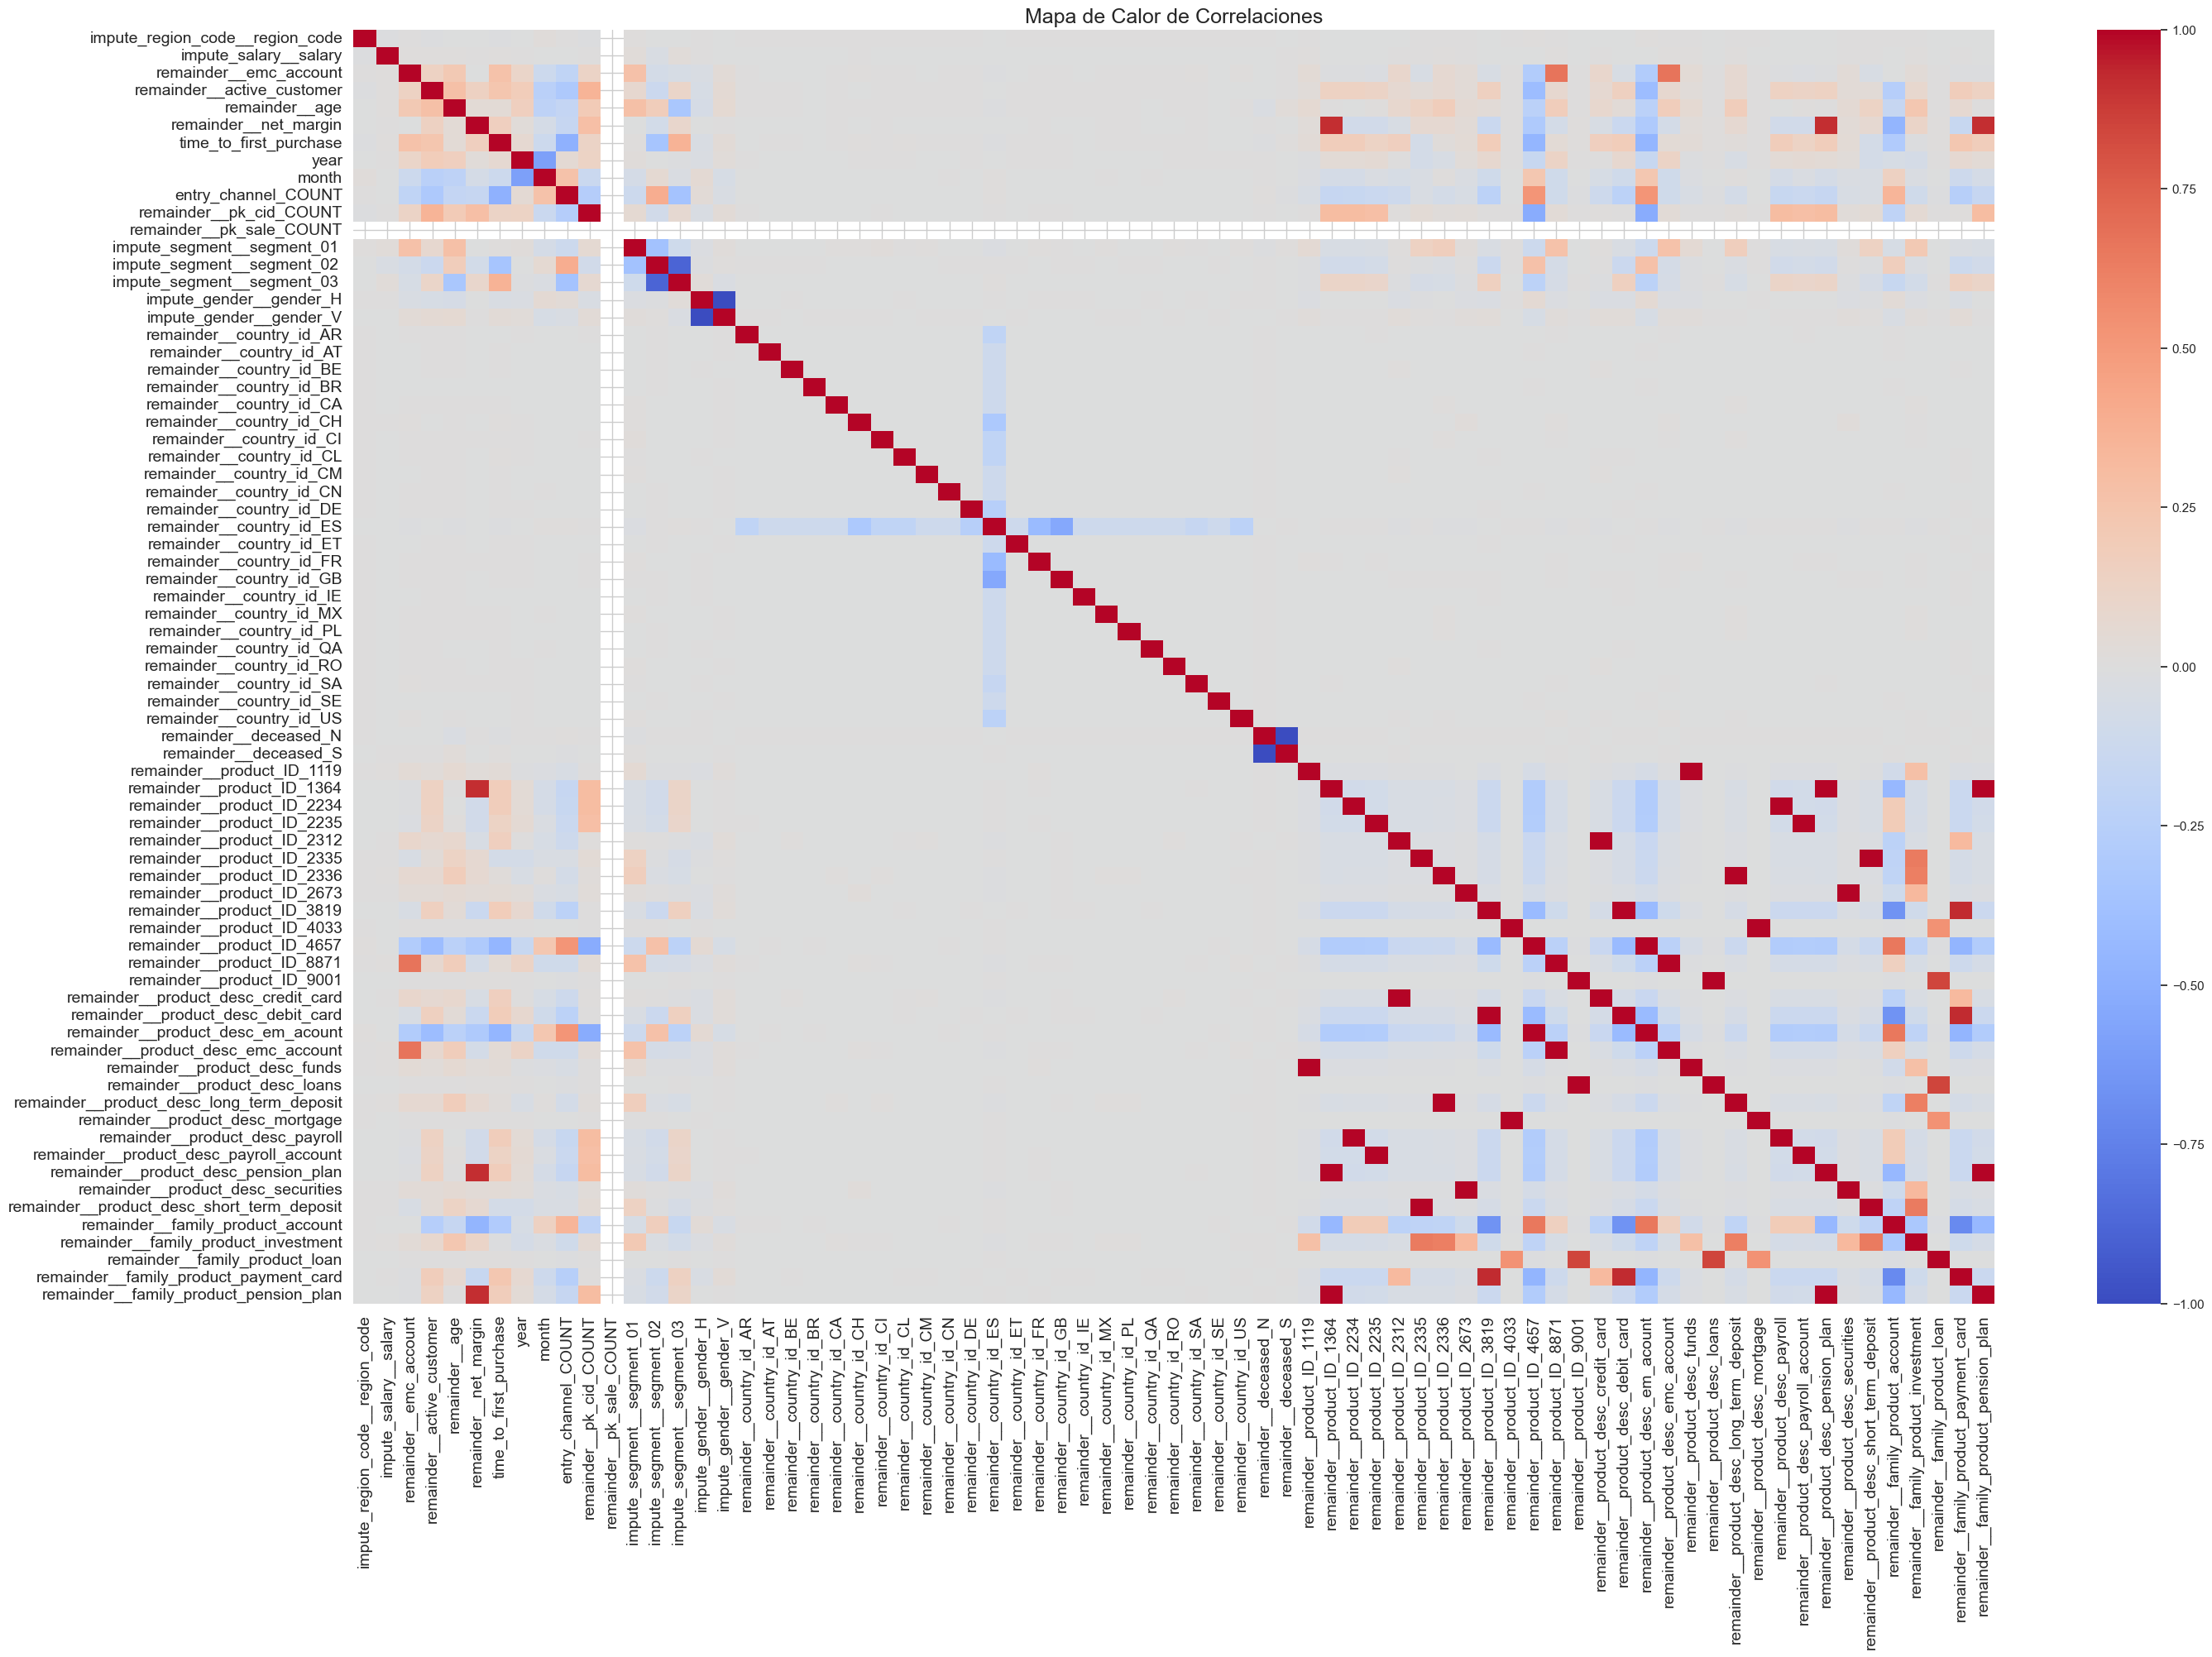

In [ ]:
#Mapa de calor 
plt.figure(figsize=(32, 20))
heatmap = sns.heatmap(X_.corr(),cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [127]:
val_df = X_[(X_['year'] == 2019) & (X_['month'] >= 3)]
dev_df = X_[(X_['year'] == 2018) | (X_['month'] < 3)]

In [128]:
val_df.shape

(31606, 73)

In [129]:
dev_df.shape

(209167, 73)

# Best model

In [130]:
def entrenar_modelo(nombre, model, Xtrain, Xtest, ytrain, ytest):
    start_time = time.time()

    #Entrenamiento
    model.fit(
        X = Xtrain, 
        y = ytrain
        )

    #Predicciones y métricas en train
    predictions_train = model.predict(Xtrain)
    accuracy_train = accuracy_score(ytrain, predictions_train)
    prec_train = precision_score(ytrain, predictions_train)
    recall_train = recall_score(ytrain, predictions_train)
    f1_value_train = f1_score(ytrain, predictions_train)
    auc_roc_value_train = roc_auc_score(ytrain, model.predict_proba(Xtrain)[:, 1])

    #Predicciones y métricas en test
    predictions_test = model.predict(Xtest)
    accuracy_test = accuracy_score(ytest, predictions_test)
    prec_test = precision_score(ytest, predictions_test)
    recall_test = recall_score(ytest, predictions_test)
    f1_value_test = f1_score(ytest, predictions_test)
    auc_roc_value_test = roc_auc_score(ytest, model.predict_proba(Xtest)[:, 1])
    matriz_test = confusion_matrix(ytest, predictions_test)

    #Determinar si hay sobreajuste
    train_auc = auc_roc_value_train
    test_auc = auc_roc_value_test
    if train_auc - test_auc > 0.1:
        overfit_msg = f"El modelo {nombre} puede estar sobreajustado."
    else:
        overfit_msg = f"El modelo {nombre} NO parece estar sobreajustado."
    print(overfit_msg)

    #Obtener importancia de características
    feature_importances = getattr(model, 'feature_importances_', None)

    #Tiempos de modelos
    end_time = time.time()
    duration = end_time - start_time

    print(f"Entrenamiento del modelo {nombre} completado. Tiempo transcurrido: {duration:.0f} segundos.\n")

    return {
        'Nombre_Modelo': nombre,
        'Accuracy_Train': accuracy_train,
        'Precision_Train': prec_train,
        'Recall_Train': recall_train,
        'F1_Score_Train': f1_value_train,
        'AUC_ROC_Train': auc_roc_value_train,
        'Accuracy_Test': accuracy_test,
        'Precision_Test': prec_test,
        'Recall_Test': recall_test,
        'F1_Score_Test': f1_value_test,
        'AUC_ROC_Test': auc_roc_value_test,
        'Feature_Importances': feature_importances,
        'Matriz_Confusión_Test': matriz_test,
        'Sobreajuste': overfit_msg
    }

def crea_modelos(dataframe, modelos):

    # # dividimos Y (target) y X (atributos)
    dev_df_X = dev_df.drop(columns = 'remainder__emc_account')
    dev_df_y = dev_df['remainder__emc_account']

    val_df_X = val_df.drop('remainder__emc_account', axis = 1)
    val_df_y = val_df[['remainder__emc_account']]

    # Dividir datos en conjunto de entrenamiento y prueba una vez
    X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=0.2, random_state=42)

    #Entrenar modelos
    resultados = [entrenar_modelo(nombre, model, X_train, X_test, y_train, y_test) for nombre, model in modelos]

    return resultados

#Definir los modelos
modelos = [
    ('Regresión Logística', LogisticRegression()),
    ('Árbol de Decisión', DecisionTreeClassifier(max_depth=50)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=30, max_depth=50)),
]


In [131]:
resultados = crea_modelos(X_, modelos)

El modelo Regresión Logística NO parece estar sobreajustado.
Entrenamiento del modelo Regresión Logística completado. Tiempo transcurrido: 4 segundos.

El modelo Árbol de Decisión puede estar sobreajustado.
Entrenamiento del modelo Árbol de Decisión completado. Tiempo transcurrido: 2 segundos.

El modelo Naive Bayes NO parece estar sobreajustado.
Entrenamiento del modelo Naive Bayes completado. Tiempo transcurrido: 2 segundos.

El modelo Random Forest NO parece estar sobreajustado.
Entrenamiento del modelo Random Forest completado. Tiempo transcurrido: 10 segundos.



In [132]:
for result in resultados:
    print(f"Modelo: {result['Nombre_Modelo']}")
    print(f"Accuracy_Train: {round(result['Accuracy_Train']*100, 2)}%")
    print(f"Precisión_Train: {round(result['Precision_Train']*100, 2)}%")
    print(f"Recall_Train: {round(result['Recall_Train']*100, 2)}%")
    print(f"F1_Score_Train: {round(result['F1_Score_Train']*100, 2)}%")
    print(f"AUC-ROC_Train: {round(result['AUC_ROC_Train']*100, 2)}%")
    print(f"\nAccuracy_Test: {round(result['Accuracy_Test']*100, 2)}%")
    print(f"Precisión_Test: {round(result['Precision_Test']*100, 2)}%")
    print(f"Recall_Test: {round(result['Recall_Test']*100, 2)}%")
    print(f"F1_Score_Test: {round(result['F1_Score_Test']*100, 2)}%")
    print(f"AUC-ROC_Test: {round(result['AUC_ROC_Test']*100, 2)}%")
    print('*********************************************************************\n')

Modelo: Regresión Logística
Accuracy_Train: 90.12%
Precisión_Train: 49.21%
Recall_Train: 0.19%
F1_Score_Train: 0.37%
AUC-ROC_Train: 78.29%

Accuracy_Test: 90.46%
Precisión_Test: 47.37%
Recall_Test: 0.23%
F1_Score_Test: 0.45%
AUC-ROC_Test: 78.72%
*********************************************************************

Modelo: Árbol de Decisión
Accuracy_Train: 100.0%
Precisión_Train: 100.0%
Recall_Train: 100.0%
F1_Score_Train: 100.0%
AUC-ROC_Train: 100.0%

Accuracy_Test: 94.07%
Precisión_Test: 68.04%
Recall_Test: 71.4%
F1_Score_Test: 69.68%
AUC-ROC_Test: 83.93%
*********************************************************************

Modelo: Naive Bayes
Accuracy_Train: 87.87%
Precisión_Train: 33.98%
Recall_Train: 24.09%
F1_Score_Train: 28.19%
AUC-ROC_Train: 79.29%

Accuracy_Test: 88.19%
Precisión_Test: 34.14%
Recall_Test: 25.7%
F1_Score_Test: 29.32%
AUC-ROC_Test: 79.28%
*********************************************************************

Modelo: Random Forest
Accuracy_Train: 99.91%
Precisió

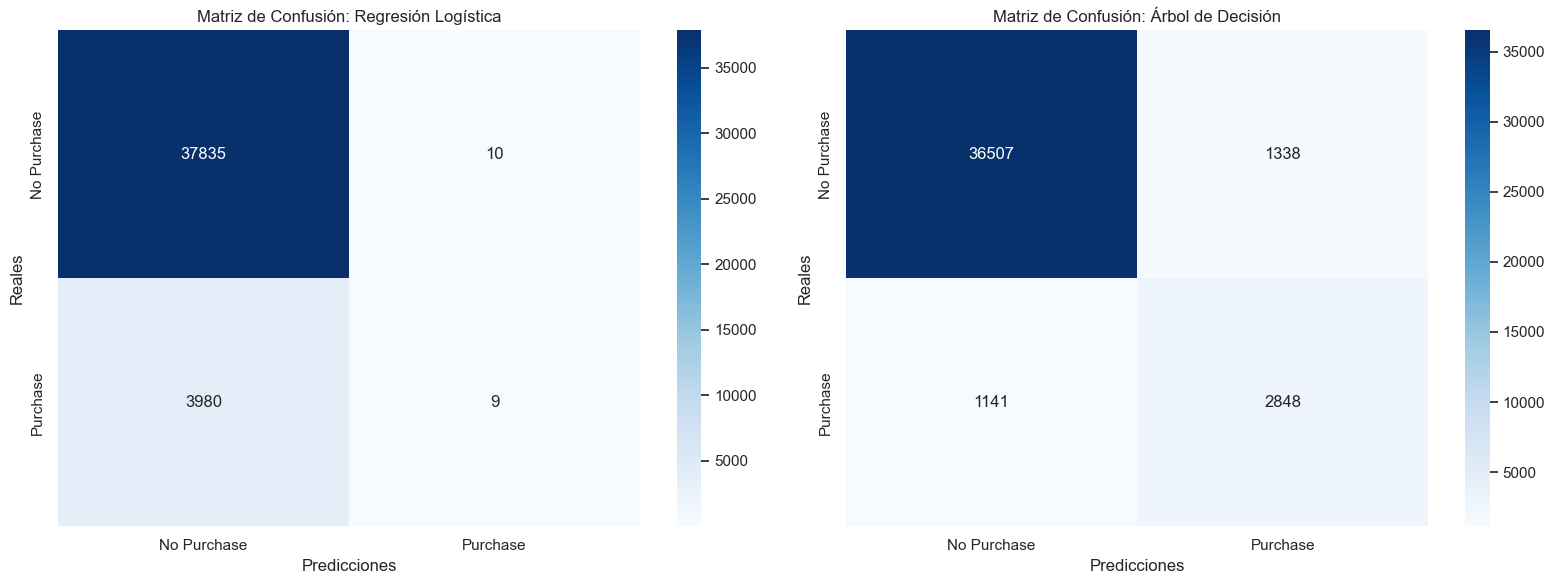

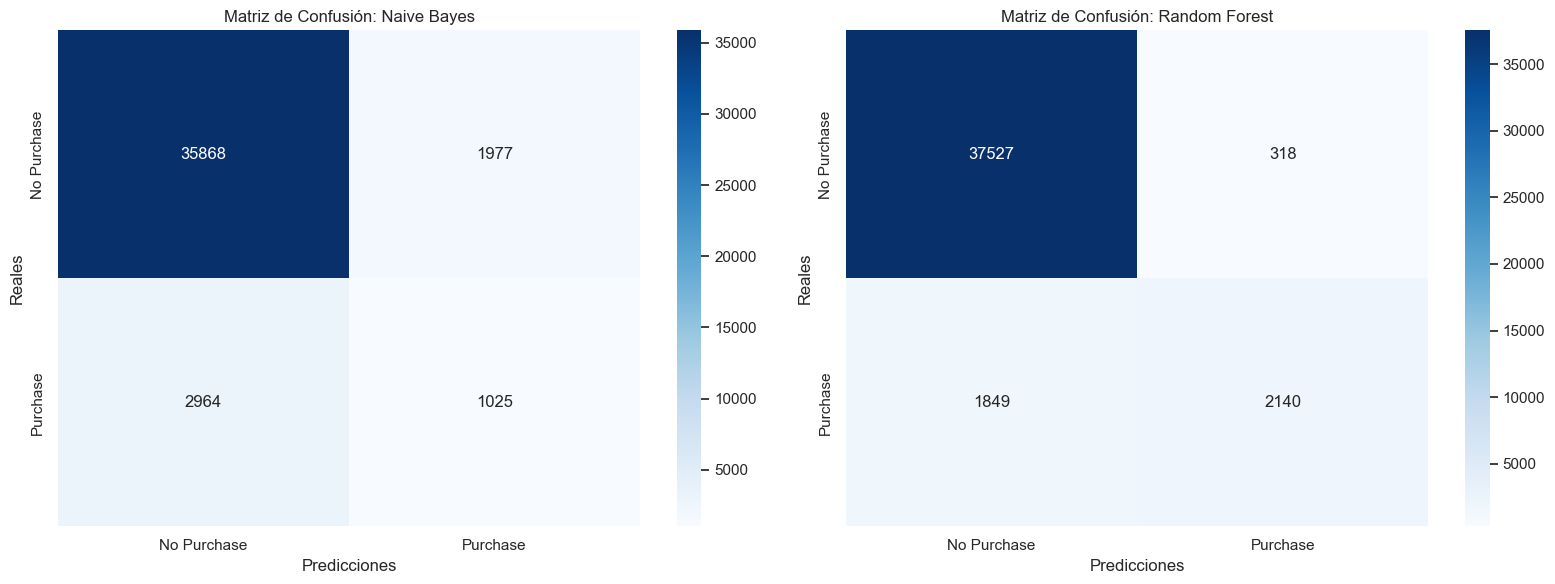

In [133]:
#Graficar la matriz de confusión
for i in range(0, len(resultados), 2):
    plt.figure(figsize=(16, 6))

    for j in range(2):
        if i + j < len(resultados):
            matriz = resultados[i + j]['Matriz_Confusión_Test']
            plt.subplot(1, 2, j + 1)
            sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
            plt.title(f"Matriz de Confusión: {resultados[i + j]['Nombre_Modelo']}")
            plt.xlabel("Predicciones")
            plt.ylabel("Reales")
            plt.gca().set_xticklabels(['No Purchase', 'Purchase'])
            plt.gca().set_yticklabels(['No Purchase', 'Purchase'])

    plt.tight_layout()
    plt.show()

In [134]:
#Función de balanceo de clases
def balanceo_clases(dataframe):

  #Aplicar SMOTE
  smote = SMOTE()

  # # dividimos Y (target) y X (atributos)
  X = dataframe.drop(columns = 'remainder__emc_account')
  y = dataframe['remainder__emc_account']
  
  X_resampled, y_resampled = smote.fit_resample(X, y)

  #Crear un nuevo df
  dataframe_balanceado = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['remainder__emc_account'])], axis=1)

  #Eliminar duplicados
  dataframe_balanceado.drop_duplicates(inplace=True)

  return dataframe_balanceado


In [135]:
X_.shape

(240773, 73)

In [136]:
 #Actualizar df
print(balanceo_clases(X_).shape)
print("*"*50)
balanceo_clases(X_).head(10)

(427908, 73)
**************************************************


,impute_region_code__region_code,impute_salary__salary,remainder__active_customer,remainder__age,remainder__net_margin,time_to_first_purchase,year,month,entry_channel_COUNT,remainder__pk_cid_COUNT,...,remainder__product_desc_payroll_account,remainder__product_desc_pension_plan,remainder__product_desc_securities,remainder__product_desc_short_term_deposit,remainder__family_product_account,remainder__family_product_investment,remainder__family_product_loan,remainder__family_product_payment_card,remainder__family_product_pension_plan,remainder__emc_account
0,7.00,164911.86,0,39,87.30,0,2018,2,21662,2,...,False,False,False,False,True,False,False,False,False,0
1,7.00,164911.86,0,39,1420.40,28,2018,3,21662,2,...,False,False,False,True,False,True,False,False,False,0
2,28.00,201225.30,0,47,62.90,0,2018,2,21662,2,...,False,False,False,False,True,False,False,False,False,0
3,28.00,201225.30,0,47,2104.10,28,2018,3,21662,2,...,False,False,False,True,False,True,False,False,False,0
4,28.00,106187.94,1,50,59.10,92,2018,2,21662,1,...,False,False,False,False,False,False,False,True,False,0
5,28.00,158588.01,1,52,88.00,0,2018,2,21662,7,...,False,False,False,False,True,False,False,False,False,0
6,28.00,158588.01,1,52,89.20,28,2018,3,21662,7,...,False,False,False,False,True,False,False,False,False,0
7,28.00,158588.01,1,52,6125.60,28,2018,3,21662,7,...,False,True,False,False,False,False,False,False,True,0
8,28.00,158588.01,1,52,63.10,28,2018,3,21662,7,...,True,False,False,False,True,False,False,False,False,0
9,28.00,158588.01,1,52,78.10,59,2018,4,21662,7,...,False,False,False,False,True,False,False,False,False,1


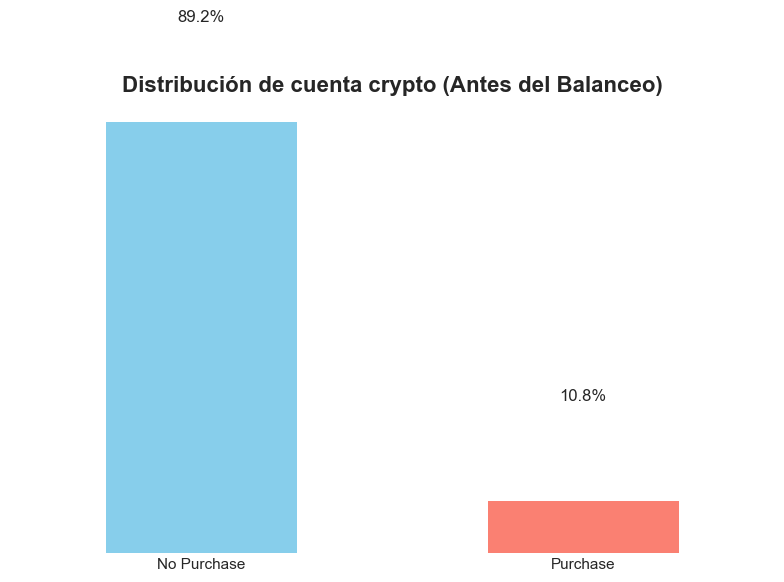

In [137]:
conteo = X_['remainder__emc_account'].value_counts()

#Crear el gráfico
plt.figure(figsize=(8, 6))
ax = conteo.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='none')
plt.title('Distribución de cuenta crypto (Antes del Balanceo)', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['No Purchase', 'Purchase'], rotation=0)
plt.tick_params(axis='y', which='both', left=False)

#Ocultar línea superior y derecha del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

#Agregar porcentaje
total = sum(conteo)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 50000, f"{round((i.get_height() / total) * 100, 2)}%", ha='center')

plt.grid(False)
plt.tight_layout()
plt.show()

In [138]:
X_balanceado = balanceo_clases(X_)
X_balanceado.head(10)

,impute_region_code__region_code,impute_salary__salary,remainder__active_customer,remainder__age,remainder__net_margin,time_to_first_purchase,year,month,entry_channel_COUNT,remainder__pk_cid_COUNT,...,remainder__product_desc_payroll_account,remainder__product_desc_pension_plan,remainder__product_desc_securities,remainder__product_desc_short_term_deposit,remainder__family_product_account,remainder__family_product_investment,remainder__family_product_loan,remainder__family_product_payment_card,remainder__family_product_pension_plan,remainder__emc_account
0,7.00,164911.86,0,39,87.30,0,2018,2,21662,2,...,False,False,False,False,True,False,False,False,False,0
1,7.00,164911.86,0,39,1420.40,28,2018,3,21662,2,...,False,False,False,True,False,True,False,False,False,0
2,28.00,201225.30,0,47,62.90,0,2018,2,21662,2,...,False,False,False,False,True,False,False,False,False,0
3,28.00,201225.30,0,47,2104.10,28,2018,3,21662,2,...,False,False,False,True,False,True,False,False,False,0
4,28.00,106187.94,1,50,59.10,92,2018,2,21662,1,...,False,False,False,False,False,False,False,True,False,0
5,28.00,158588.01,1,52,88.00,0,2018,2,21662,7,...,False,False,False,False,True,False,False,False,False,0
6,28.00,158588.01,1,52,89.20,28,2018,3,21662,7,...,False,False,False,False,True,False,False,False,False,0
7,28.00,158588.01,1,52,6125.60,28,2018,3,21662,7,...,False,True,False,False,False,False,False,False,True,0
8,28.00,158588.01,1,52,63.10,28,2018,3,21662,7,...,True,False,False,False,True,False,False,False,False,0
9,28.00,158588.01,1,52,78.10,59,2018,4,21662,7,...,False,False,False,False,True,False,False,False,False,1


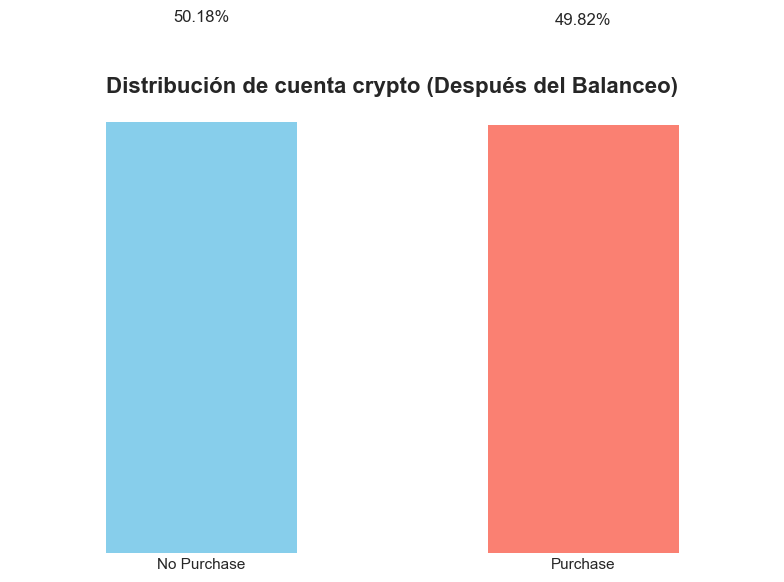

In [139]:
conteo_balancedo = X_balanceado['remainder__emc_account'].value_counts()

#Crear el gráfico
plt.figure(figsize=(8, 6))
ax = conteo_balancedo.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='none')
plt.title('Distribución de cuenta crypto (Después del Balanceo)', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['No Purchase', 'Purchase'], rotation=0)
plt.tick_params(axis='y', which='both', left=False)

#Ocultar línea superior y derecha del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

#Agregar porcentaje
total = sum(conteo_balancedo)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 50000, f"{round((i.get_height() / total) * 100, 2)}%", ha='center')

plt.grid(False)
plt.tight_layout()
plt.show()

### Volvemos a entrenar a los modelos para ver la diferencia con el dataset balanceado

In [140]:
X_balanceado.pivot_table(index= ['year', 'month'], values = 'remainder__emc_account', aggfunc = [len, np.sum, np.mean])

len                    sum  \
           remainder__emc_account remainder__emc_account   
year month                                                 
2018 1                       3236                   3236   
     2                      35895                  23220   
     3                      31071                  21168   
     4                      28521                  20014   
     5                      27749                  19629   
     6                      25948                  15890   
     7                      32534                  13183   
     8                      31506                  11489   
     9                      34104                  11155   
     10                     36216                  10683   
     11                     27164                   9906   
     12                     17158                   4024   
2019 1                      18779                   8655   
     2                      21039                  11590   
     3                      21521                  11587   
     4                      20526                  12332   
     5                      14964                   6962   

                             mean  
           remainder__emc_account  
year month                         
2018 1                       1.00  
     2                       0.65  
     3                       0.68  
     4                       0.70  
     5                       0.71  
     6                       0.61  
     7                       0.41  
     8                       0.36  
     9                       0.33  
     10                      0.29  
     11                      0.36  
     12                      0.23  
2019 1                       0.46  
     2                       0.55  
     3                       0.54  
     4                       0.60  
     5                       0.47

In [141]:
val_df_balanceado = X_balanceado[(X_balanceado['year'] == 2019) & (X_balanceado['month'] >= 3)]
dev_df_balanceado = X_balanceado[(X_balanceado['year'] == 2018) | (X_balanceado['month'] < 3)]

In [142]:
val_df_balanceado.shape

(57011, 73)

In [143]:
dev_df_balanceado.shape

(370920, 73)

In [144]:
resultados_balanceados = crea_modelos(X_balanceado, modelos)

El modelo Regresión Logística NO parece estar sobreajustado.
Entrenamiento del modelo Regresión Logística completado. Tiempo transcurrido: 4 segundos.

El modelo Árbol de Decisión puede estar sobreajustado.
Entrenamiento del modelo Árbol de Decisión completado. Tiempo transcurrido: 2 segundos.

El modelo Naive Bayes NO parece estar sobreajustado.
Entrenamiento del modelo Naive Bayes completado. Tiempo transcurrido: 2 segundos.

El modelo Random Forest NO parece estar sobreajustado.
Entrenamiento del modelo Random Forest completado. Tiempo transcurrido: 11 segundos.



In [145]:
for results in resultados_balanceados:
    print(f"Modelo: {results['Nombre_Modelo']}")
    print(f"Accuracy_Train: {round(results['Accuracy_Train']*100, 2)}%")
    print(f"Precisión_Train: {round(results['Precision_Train']*100, 2)}%")
    print(f"Recall_Train: {round(results['Recall_Train']*100, 2)}%")
    print(f"F1_Score_Train: {round(results['F1_Score_Train']*100, 2)}%")
    print(f"AUC-ROC_Train: {round(results['AUC_ROC_Train']*100, 2)}%")
    print(f"\nAccuracy_Test: {round(results['Accuracy_Test']*100, 2)}%")
    print(f"Precisión_Test: {round(results['Precision_Test']*100, 2)}%")
    print(f"Recall_Test: {round(results['Recall_Test']*100, 2)}%")
    print(f"F1_Score_Test: {round(results['F1_Score_Test']*100, 2)}%")
    print(f"AUC-ROC_Test: {round(results['AUC_ROC_Test']*100, 2)}%")
    print('*********************************************************************\n')

Modelo: Regresión Logística
Accuracy_Train: 90.12%
Precisión_Train: 49.21%
Recall_Train: 0.19%
F1_Score_Train: 0.37%
AUC-ROC_Train: 78.29%

Accuracy_Test: 90.46%
Precisión_Test: 47.37%
Recall_Test: 0.23%
F1_Score_Test: 0.45%
AUC-ROC_Test: 78.72%
*********************************************************************

Modelo: Árbol de Decisión
Accuracy_Train: 100.0%
Precisión_Train: 100.0%
Recall_Train: 100.0%
F1_Score_Train: 100.0%
AUC-ROC_Train: 100.0%

Accuracy_Test: 94.1%
Precisión_Test: 68.22%
Recall_Test: 71.35%
F1_Score_Test: 69.75%
AUC-ROC_Test: 83.92%
*********************************************************************

Modelo: Naive Bayes
Accuracy_Train: 87.87%
Precisión_Train: 33.98%
Recall_Train: 24.09%
F1_Score_Train: 28.19%
AUC-ROC_Train: 79.29%

Accuracy_Test: 88.19%
Precisión_Test: 34.14%
Recall_Test: 25.7%
F1_Score_Test: 29.32%
AUC-ROC_Test: 79.28%
*********************************************************************

Modelo: Random Forest
Accuracy_Train: 99.92%
Precisió

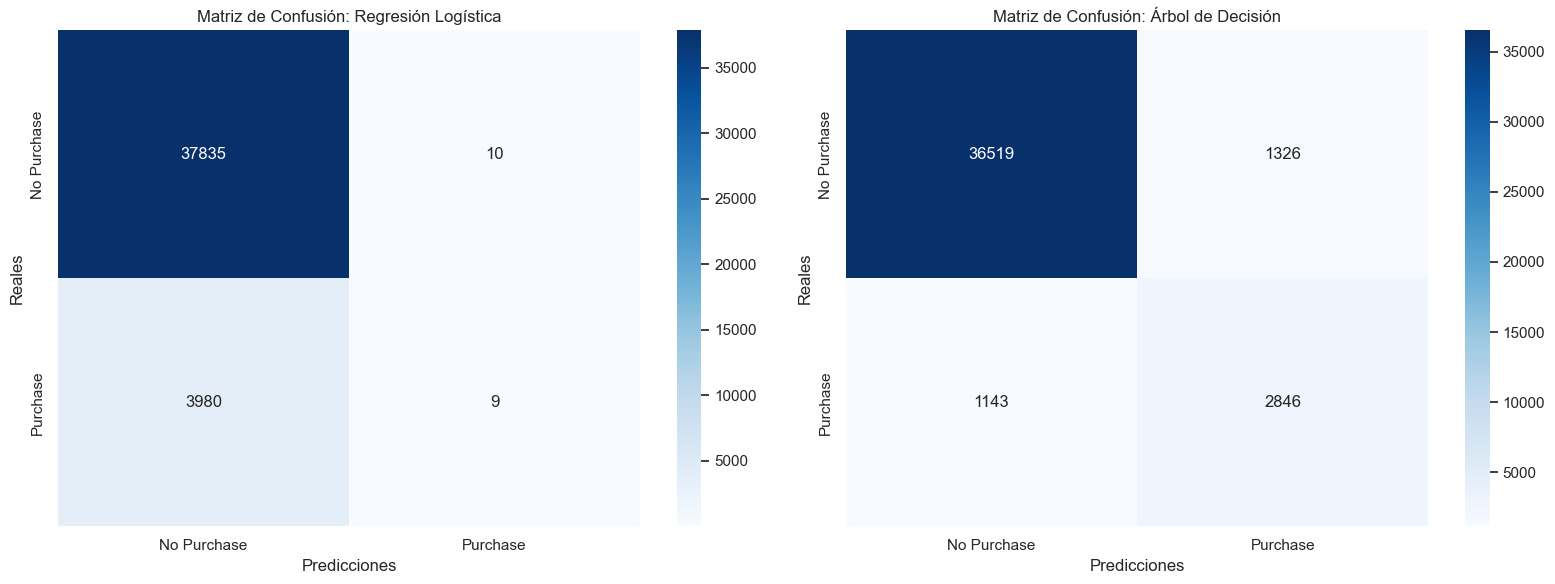

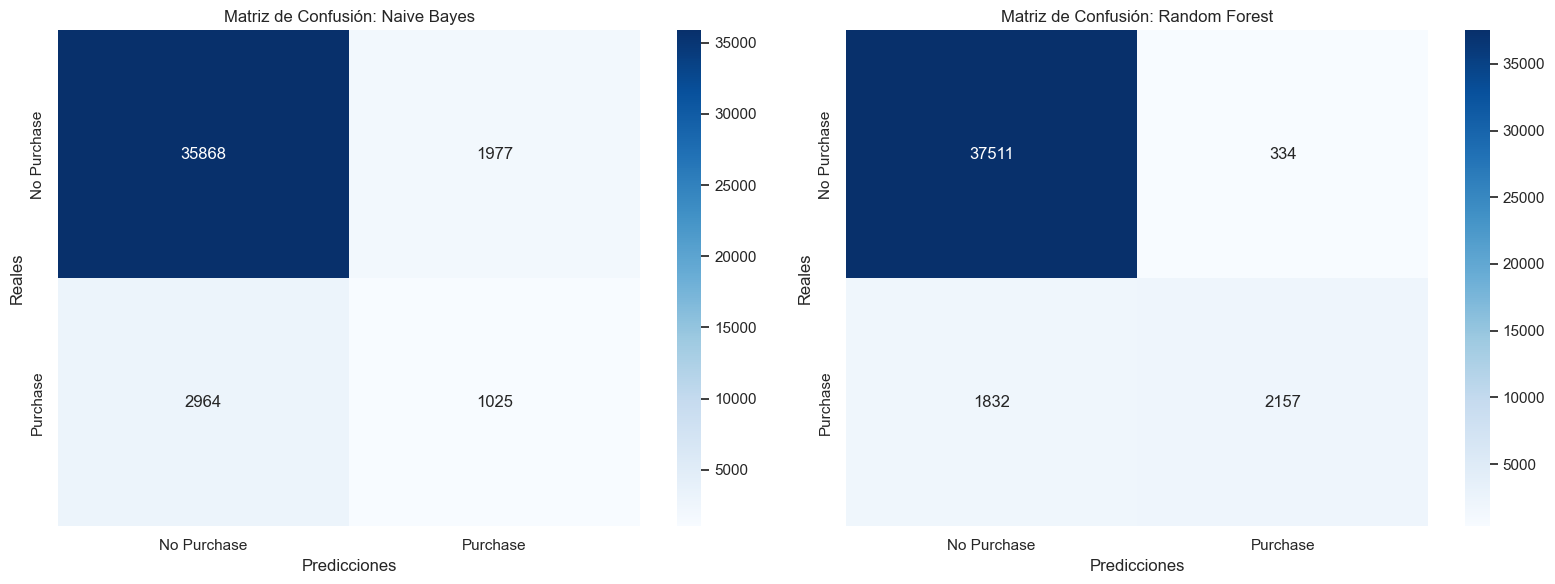

In [146]:
#Graficar la matriz de confusión
for i in range(0, len(resultados_balanceados), 2):
    plt.figure(figsize=(16, 6))

    for j in range(2):
        if i + j < len(resultados_balanceados):
            matriz = resultados_balanceados[i + j]['Matriz_Confusión_Test']
            plt.subplot(1, 2, j + 1)
            sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
            plt.title(f"Matriz de Confusión: {resultados_balanceados[i + j]['Nombre_Modelo']}")
            plt.xlabel("Predicciones")
            plt.ylabel("Reales")
            plt.gca().set_xticklabels(['No Purchase', 'Purchase'])
            plt.gca().set_yticklabels(['No Purchase', 'Purchase'])

    plt.tight_layout()
    plt.show()

# Train test

In [143]:
# # dividimos Y (target) y X (atributos)

# dev_df_X = dev_df.drop('remainder__emc_account', axis = 1)
# dev_df_y = dev_df[['remainder__emc_account']]

# val_df_X = val_df.drop('remainder__emc_account', axis = 1)
# val_df_y = val_df[['remainder__emc_account']]

### Random holdout

from sklearn import model_selection
from sklearn import metrics

In [144]:
# X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=0.2, random_state=42)

In [145]:
# X_train.describe().T.head(3)

In [146]:
# X_test.describe().T.head(3)

In [147]:
# y_train.describe().T

In [148]:
# y_test.describe().T

### Modelling


In [149]:
# dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 100, random_state = 42)

In [150]:
# dt.fit(
#     x = X_train,
#     y = y_train
# )

### Evaluation

In [151]:
# y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index = y_test.index, columns = ['PurchaseScore'])

In [152]:
# results_df = y_test.join(y_score)

In [153]:
# results_df.tail(10)

In [154]:
# results_df['Success'] = (results_df['remainder__emc_account'] == results_df['PurchaseScore']).astype(int)

In [155]:
# results_df

In [156]:
# y_test

In [157]:
# y_score

In [158]:
# print(metrics.classification_report(y_test,y_score))
# fpr_xgb, tpr_xgb, th_xgb = metrics.roc_curve(results_df['remainder__emc_account'], results_df['PurchaseScore'])

In [159]:
# plt.plot([0,1], [0,1], color = 'grey')
# plt.plot(fpr_xgb,tpr_xgb)
# plt.xlabel('FPR')
# plt.ylabel('TPR')

In [160]:
# AUC_score = round(metrics.roc_auc_score(results_df['remainder__emc_account'], results_df['PurchaseScore']),2)
# print(f'El AUC del DT con un valor de: {AUC_score}')

In [161]:
# confusion_matrix = pd.crosstab(results_df['remainder__emc_account'], results_df['PurchaseScore'])
# confusion_matrix